In [3]:
import numpy as np
import sys
from pathlib import Path
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

notebook_dir = Path(os.getcwd())
project_root = notebook_dir.parent if notebook_dir.name == 'notebooks' else notebook_dir
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import pandas as pd
from src.models_garch import garch_model, garch_model_forecast
from data_pipeline import build_spy_pipeline

In [4]:
csv_path = project_root / 'SPY_returns.csv'

train_df, test_df, X_train_seq, y_train_seq, X_test_seq, y_test_seq = build_spy_pipeline(
    csv_path=str(csv_path),
    split_date="2020-01-01",
    vol_window=21,               # rolling window for realized volatility
    seq_window=20                # window length for future LSTM
)


train_df.head()

,ret,realized_vol
Date,,
2010-02-03,-0.004982,0.010349
2010-02-04,-0.030866,0.012119
2010-02-05,0.002067,0.012144
2010-02-08,-0.007219,0.012061
2010-02-09,0.012560,0.012484


In [5]:
# Fit the GARCH model on training returns from the pipeline
res, garch_vol_train = garch_model(train_df['ret'], 1, 1)

# Attach in-sample GARCH volatility to the training DataFrame (optional but nice for plotting)
train_df['GARCH_vol'] = garch_vol_train

var_forecast = garch_model_forecast(train_df['ret'], 1, 1)

print("5-day forecasted volatility:", var_forecast)


5-day forecasted volatility: 0.005259687117431445


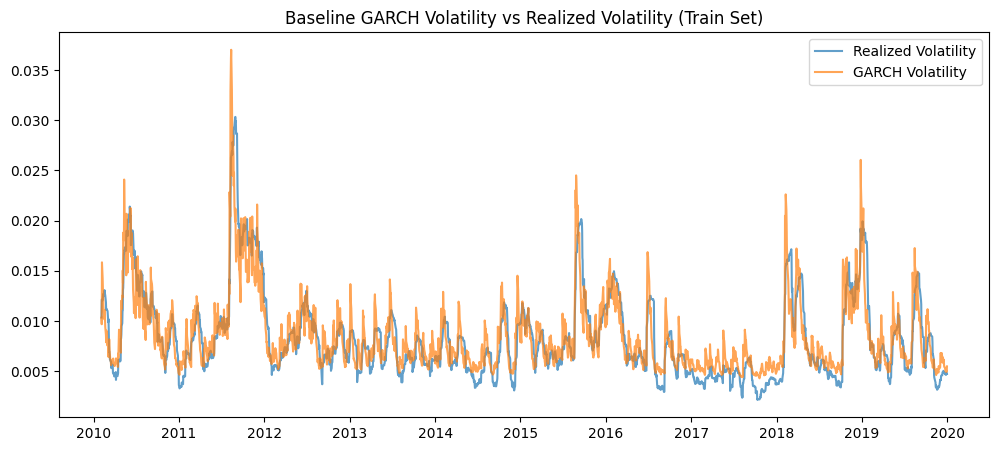

In [6]:
#Compare GARCH Predicted vs Realized Vol

plt.figure(figsize=(12,5))
plt.plot(train_df.index, train_df['realized_vol'], label="Realized Volatility", alpha=0.7)
plt.plot(train_df.index, train_df['GARCH_vol'], label="GARCH Volatility", alpha=0.7)
plt.title("Baseline GARCH Volatility vs Realized Volatility (Train Set)")
plt.legend()
plt.show()

In [7]:
rmse = np.sqrt(mean_squared_error(train_df['realized_vol'], train_df['GARCH_vol']))
print("GARCH RMSE on training set:", rmse)
mse = mean_squared_error(train_df['realized_vol'], train_df['GARCH_vol'])
print("MSE:", mse)

GARCH RMSE on training set: 0.0021011215635337844
MSE: 4.4147118247466544e-06
